<a href="https://www.kaggle.com/code/fareselmenshawii/cnn-from-scratch?scriptVersionId=119458754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:10px; 
            color:black;
            margin:10px;
            font-size:150%;
            display:block;
            border-radius:1px;
            border-style: solid;
            border-color:skyblue;
            background-color:#00EFFF;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b style="color:black">Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1" style="color:black">1 -  Overview</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 - Import</a>
        </li>
<!--          <li> -->
         <li>
            <a href="#3" style="color:black">3 - Data Analysis</a>
        </li>
            <li>
            <a href="#4" style="color:black">4 - Model Implementation</a>
            <ul>
                <li>
                    <a href="#4-1" style="color:black">4.1 - Conv2D Layer</a>
                </li>
                <li>
                    <a href="#4-2" style="color:black">4.2 -Pooling2D Layer</a>
                </li>
                <li>
                    <a href="#4-3" style="color:black">4.3 - Flatten Layer</a>
                </li>
                <li>
                    <a href="#4-4" style="color:black">4.4 - Dense Layer</a>
                </li>
                <li>
                    <a href="#4-5" style="color:black">4.5 -Putting it all together</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#5" style="color:black">5 - Train and evaluate the network</a>
            <ul>
            </ul>
        </li>
        <li>
            <a href="#6" style="color:black">6 - Thank you</a>
        </li>
    </ul>
</div>


<a id="1"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Overview</center></h1>

# Overview

**"Unlocking the Mysteries of Neural Networks: A Hands-On Approach**

**Have you ever wondered how Neural Networks function and make decisions? Have you ever wanted to gain a deeper understanding of this complex technology? If so, this series of notebooks is for you! We'll be exploring the inner workings of Neural Networks and implementing them from scratch.**

**Our journey will start by constructing a basic Convolutional Neural Network (CNN) and then optimizing it to achieve improved performance. This hands-on approach will provide a practical understanding of the technology, allowing us to dive deeper into its intricacies.**

**Let's get started!**

<a id="2"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Imports</center></h1>

# Imports
     

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import plotly.express as px
import os
import itertools
import plotly.graph_objs as go

<a id="3"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv') # read training dataframe
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv') # read test dataframe

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def one_hot_encode(indices, num_classes):
    """
    Converts a list of integer indices into a one-hot encoding matrix.

    Parameters:
    indices (list): A list of integer indices representing the classes.
    num_classes (int): The number of classes.

    Returns:
    one_hot (numpy.ndarray): A 2D numpy array of shape (len(indices), num_classes) containing the one-hot encoding representation.
    """
    # Create a 2D numpy array of zeros with shape (len(indices), num_classes) and data type np.float32
    one_hot = np.zeros((len(indices), num_classes), dtype=np.float32)
    
    # Set the elements at the specified indices to 1
    one_hot[np.arange(len(indices)), indices] = 1
    
    # Return the one-hot encoding matrix
    return one_hot

In [5]:
X = train.iloc[:,1:].values  # set training data
y = train.iloc[:,0].values # set training labels
X = X.reshape(-1,28,28,1) # reshape into a format that can be fed into our NN
X = X / 255 # normalize X values between 0 and 1

### Get the number of classes

In [6]:
n_classes = train.label.nunique()

### One Hot Encode y

In [7]:
y = one_hot_encode(y, n_classes)

### Get subset of the data to train on

In [8]:
X_subset = X[:200]
y_subset = y[:200]

### Verify the data

In [9]:
px.imshow(X_subset[20].reshape(28,28),color_continuous_scale='ice')

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Implemention</center></h1>

# Model Implemention

## Padding 
**Padding involves adding a border of zeros around an image, in order to maintain its original shape after undergoing a convolution operation.**


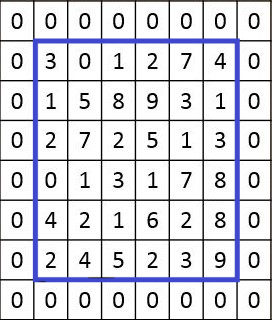

In [10]:
def zero_pad(X, padding):
    """
    Pad with zeros all images of the dataset X

    Argument:
    X --  numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    X_pad = np.pad(X, ((0, 0), (padding, padding), (padding, padding), (0, 0)), 'constant', constant_values=(0, 0))
    return X_pad

### Forward Propagation <a name="4-1"></a>

**The forward pass equation for the 2D convolution layer in the given code can be represented as:**

**$$ Z = g(\mathbf{A_{prev} \ast W} + \mathbf{b}) $$**

**where:**

**$\mathbf{A_{prev}}$ is the output activations of the previous layer, with shape (batch_size, height_prev, width_prev, channels_prev)**

 **$\ast$ represents the convolution operation**

**$\mathbf{W}$ is the weights with shape (filter_size, filter_size, channels_prev, filters)**

**$\mathbf{b}$ is the biases with shape (1, 1, 1, filters)**

**$g(x)$ is the activation function applied element-wise to the result of the convolution and bias addition**

**$Z$ is the output of the convolution layer, with shape (batch_size, height, width, filters)**

**we can calculate the dimensions of the output using the following equation:**
**$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f}{stride} \Bigr\rfloor +1$$**

**$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f}{stride} \Bigr\rfloor +1$$**

**$$n_C = n_{C_{prev}}$$**

**Here is a gif that examples how the convolution forward operation works**


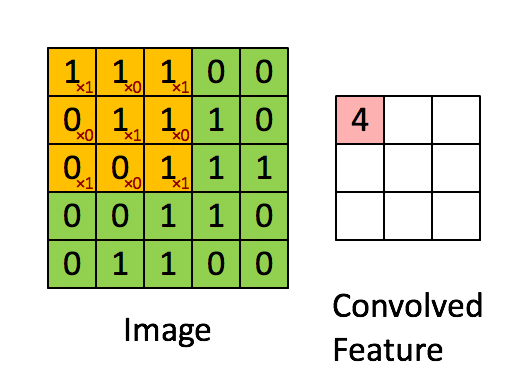


### BackPropagation

**Let's start by implementing the backward pass for a CONV layer.** 

#### - Computing dA:
**This is the formula for computing $dA$ with respect to the cost for a certain filter $W_c$ and a given training example:**

**$$dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$**

**Where $W_c$ is a filter and $dZ_{hw}$ is a scalar corresponding to the gradient of the cost with respect to the output of the conv layer Z at the hth row and wth column (corresponding to the dot product taken at the ith stride left and jth stride down). Note that at each time, you multiply the the same filter $W_c$ by a different dZ when updating dA. We do so mainly because when computing the forward propagation, each filter is dotted and summed by a different a_slice. Therefore when computing the backprop for dA, you are just adding the gradients of all the a_slices.** 



#### - Computing dW:
**This is the formula for computing $dW_c$ ($dW_c$ is the derivative of one filter) with respect to the loss:**

**$$dW_c  \mathrel{+}= \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$**

**Where $a_{slice}$ corresponds to the slice which was used to generate the activation $Z_{ij}$. Hence, this ends up giving us the gradient for $W$ with respect to that slice. Since it is the same $W$, we will just add up all such gradients to get $dW$.**





#### - Computing db:

**This is the formula for computing $db$ with respect to the cost for a certain filter $W_c$:**

**$$db = \sum_h \sum_w dZ_{hw} \tag{3}$$**




## Conv2D

In [11]:
class Conv2D:
    """
    A 2D Convolutional Layer in a Neural Network.

    Attributes:
        filters (int): The number of filters in the Convolutional layer.
        filter_size (int): The size of the filters.
        input_channels (int, optional): The number of input channels. Default is 3.
        padding (int, optional): The number of zero padding to be added to the input image. Default is 0.
        stride (int, optional): The stride length. Default is 1.
        learning_rate (float, optional): The learning rate to be used during training. Default is 0.001.
        optimizer (object, optional): The optimization method to be used during training. Default is None.
        cache (dict, optional): A dictionary to store intermediate values during forward and backward pass. Default is None.
        initialized (bool, optional): A flag to keep track of whether the layer has been initialized. Default is False.
    """
    def __init__(self, filters, filter_size, input_channels=3, padding=0, stride=1,learning_rate=0.001, optimizer=None):
        """
        Initialize the Conv2D layer with the given parameters.

        Args:
            filters (int): The number of filters in the Convolutional layer.
            filter_size (int): The size of the filters.
            input_channels (int, optional): The number of input channels. Default is 3.
            padding (int, optional): The number of zero padding to be added to the input image. Default is 0.
            stride (int, optional): The stride length. Default is 1.
            learning_rate (float, optional): The learning rate to be used during training. Default is 0.001.
            optimizer (object, optional): The optimization method to be used during training. Default is None.
        """
        self.filters = filters
        self.filter_size = filter_size
        self.input_channels = input_channels
        self.padding = padding
        self.stride = stride
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.cache = None
        self.initialized = False
        
    def relu(self, Z):
        """
        Implement the ReLU function.

        Arguments:
        Z -- Output of the linear layer

        Returns:
        A -- Post-activation parameter
        cache -- used for backpropagation
        """
        A = np.maximum(0,Z)
        cache = Z 
        return A, cache
    
    def relu_backward(self, dA, activation_cache):
        """
        Implement the backward propagation for a single ReLU unit.

        Arguments:
        dA -- post-activation gradient, of any shape
        activation_cache -- "Z" where we store for computing backward propagation efficiently

        Returns:
        dZ -- Gradient of the cost with respect to Z
        """

        Z = activation_cache
        dZ = np.array(dA, copy=True) # just converting dz to a correct object.)
        # When z <= 0, you should set dz to 0 as well. 
        dZ[Z <= 0] = 0

        return dZ

        
    def conv_single_step(self, a_slice_prev, W, b):
        """
        Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
        of the previous layer.

        Parameters:
        a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
        W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
        b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
        Returns:
        A -- result of applying the activation function to Z
        cache -- used for backpropagation
        """
        s = np.multiply(a_slice_prev, W)
        Z = np.sum(s)
        Z = Z + float(b)
        return Z

    def forward(self, A_prev):
        """
        Implements the forward propagation for a convolution function

        Parameters:
        A_prev -- output activations of the previous layer,
            numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)

        Returns:
        Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache of values needed for the conv_backward() function
        """
        #Create list to store activation cache for backprop
        activation_caches = []
        # Initialize neural network
        if self.initialized == False:
            np.random.seed(0)
            self.W = np.random.randn(self.filter_size, self.filter_size, A_prev.shape[-1], self.filters) 
            self.b = np.random.randn(1, 1, 1, self.filters)
            self.initialized = True
        # Retrieve dimensions from A_prev's shape
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        # Retrieve dimensions from W's shape
        (f, f, n_C_prev, n_C) = self.W.shape

        # Compute the dimensions of the  output volume
        n_H = int((n_H_prev - f + (2 * self.padding)) / self.stride) + 1
        n_W = int((n_W_prev - f + (2 * self.padding)) / self.stride) + 1
        # Initialize the output volume Z with zeros.
        Z = np.zeros((m, n_H, n_W, n_C))

        # add padding to A_prev
        A_prev_pad = zero_pad(A_prev, self.padding)
        # loop over the batch of training examples
        for i in range(m):
            # Select ith training example's padded activation
            a_prev_pad = A_prev_pad[i]  
            for h in range(n_H): 
                # Find the vertical start and end 
                vert_start = h * self.stride
                vert_end = vert_start + f
                # loop over horizontal axis of the output volume
                for w in range(n_W):  
                    # Find the horizontal start  
                    horiz_start = w * self.stride
                    horiz_end = horiz_start + f
                    # loop over channels
                    for c in range(n_C):  

                        # Use the corners to define the slice of a_prev_pad
                        a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                        # Convolve the slice with the  filter W and bias b 
                        weights = self.W[:, :, :, c]
                        biases = self.b[:, :, :, c] 
                        Z[i, h, w, c] = self.conv_single_step(a_slice_prev, weights, biases)
                # Apply ReLU activation and store cache for backpropagation
                Z[i], activation_cache = self.relu(Z[i])
                # Append the activation to the caches list
                activation_caches.append(activation_cache)
        
        self.cache = (A_prev, np.array(activation_caches))
    
        return Z

    def backward(self, dZ):
        """
        Implement the backward propagation for a convolution function

        Parameters:
        dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache of values needed for the conv_backward(), output of conv_forward()

        Returns:
        dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
                   numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
        dW -- gradient of the cost with respect to the weights of the conv layer (W)
              numpy array of shape (f, f, n_C_prev, n_C)
        db -- gradient of the cost with respect to the biases of the conv layer (b)
              numpy array of shape (1, 1, 1, n_C)
        """
        
        # Retrieve information from "cache"
        A_prev, activation_cache = self.cache
        W, b = self.W, self.b
        # Retrieve dimensions from A_prev's shape
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        # Retrieve dimensions from W's shape
        (f, f, n_C_prev, n_C) = W.shape

        # Retrieve strides, padding information"
        stride = self.stride
        pad = self.padding
        # Activation Gradient
        
        # Retrieve dimensions from dZ's shape
        (m, n_H, n_W, n_C) = dZ.shape

        # Initialize dA_prev, dW, db 
        dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
        self.dW = np.zeros((f, f, n_C_prev, n_C))
        self.db = np.zeros((1, 1, 1, n_C))

        # Pad A_prev and dA_prev
        A_prev_pad = zero_pad(A_prev, pad)
        dA_prev_pad = zero_pad(dA_prev, pad)
        # loop over the training examples
        for i in range(m):
            # Compute gradients of the activation function 
            dZ[i] = self.relu_backward(dZ[i], activation_cache[i])
            # select ith training example from A_prev_pad and dA_prev_pad
            a_prev_pad = A_prev_pad[i]
            da_prev_pad = dA_prev_pad[i]
            # loop over vertical axis of the output volume
            for h in range(n_H):                   
                vert_start = h * stride
                vert_end = vert_start + f
                # loop over horizontal axis of the output volume
                for w in range(n_W):               
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    # loop over the channels of the output volume
                    for c in range(n_C):          
                        # Find a slice using the dimensions
                        a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                        
                        # Update gradients for the window and the filter's parameters 
                        da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                        self.dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                        self.db[:,:,:,c] += dZ[i, h, w, c]
                        
            # Set the ith training example's dA_prev to the unpaded da_prev_pad
            if pad:
                dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
            else:
                dA_prev[i, :, :, :] = dA_prev[i, :, :, :]
    
        
        self.update_parameters(self.optimizer)
        return dA_prev

    
    def Adam(self,beta1=0.9, beta2=0.999):
        """
        Update parameters using Adam

        Parameters:
        beta1 -- Exponential decay hyperparameter for the first moment estimates 
        beta2 -- Exponential decay hyperparameter for the second moment estimates 
        """
        self.v_dW = np.zeros(self.W.shape)
        self.v_db = np.zeros(self.b.shape)
        self.s_dW = np.zeros(self.W.shape)
        self.s_db = np.zeros(self.b.shape)

        self.v_dW = beta1 * self.v_dW + (1-beta1) * self.dW
        self.v_db = beta1 * self.v_db + (1-beta1) * self.db

        self.v_dW = self.v_dW / (1-beta1**2)
        self.v_db = self.v_db / (1-beta1**2)

        self.s_dW = beta2 * self.s_dW + (1-beta2) * np.square(self.dW)
        self.s_db = beta2 * self.s_db + (1-beta2) * np.square(self.db)

        self.s_dW = self.s_dW / (1-beta2**2)
        self.s_db = self.s_db / (1-beta2**2)

        self.W = self.W - self.learning_rate * self.dW  
        self.b = self.b - self.learning_rate * self.db 

        
    def update_parameters(self,optimizer=None):
        """
        Updates parameters 
        Parameters:
        Optimizer -- the optimizer used (default) : None           
        """
        if optimizer == 'adam':
            self.Adam()
        else:   
            self.W = self.W - self.learning_rate * self.dW 
            self.b = self.b - self.learning_rate * self.db 


## Pooling2D

### Forward Propagation<a name="4-2"></a>
The forward pass equation for the pooling layer in the given code can be represented as:

$$ A_{i, h, w, c} = g(\text{a_prev_slice}) $$

where:

$g$ is either the max or average function, depending on the pooling mode

$\text{a_prev_slice}$ is the slice of the input data A_prev with shape (f, f)

$A_{i, h, w, c}$ is the output of the pooling layer at indices i, h, w, and c, which represent the training example, height, width, and channel, respectively.

$\mathbf{A_{prev}}$ is the input data with shape (m, n_H_prev, n_W_prev, n_C_prev), where m is the number of training examples, n_H_prev and n_W_prev are the height and width of the input, and n_C_prev is the number of channels in the input.

we can calculate the dimensions of the output using the following equation:
$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_C = n_{C_{prev}}$$


### Create Mask from Window Function
The create_mask_from_window function is used to identify the maximum entry in the input array x of shape (f, f). The function creates a binary mask of the same shape as x with a True value at the position corresponding to the maximum entry of x.

$$ mask = \begin{cases} True & \text{if } x_{i,j} = \max\limits_{p,q} x_{p,q} \ False & \text{otherwise} \end{cases} $$

where $x_{i,j}$ is an entry of the input array x of shape (f, f).

### Distribute Value Function
The distribute_value function distributes the input scalar value dz over a matrix of shape (n_H, n_W). The function computes the average value to distribute over the matrix and returns an array of size (n_H, n_W) with each entry equal to the computed average.

$$ a_{i,j} = \frac{dz}{n_H \cdot n_W} $$

where $a_{i,j}$ is an entry of the output array of shape (n_H, n_W).


### BackPropagation

The backward pass equation for the pooling layer in the given code can be represented as:

$$ dA_{prev} = \text{backward}(dA) $$

where:

$dA$ is the gradient of cost with respect to the output of the pooling layer, with shape (batch_size, n_H, n_W, n_C)

$dA_{prev}$ is the gradient of cost with respect to the input of the pooling layer, with shape (batch_size, n_H_prev, n_W_prev, n_C_prev)

**In the backward function, the dA_prev tensor is initialized with zeros. Then, the function loops over the training examples, the height and width of the output, and the channels of the output. For each iteration, the vert_start, vert_end, horiz_start, and horiz_end are computed to define the current slice from the previous activation tensor a_prev. If the mode is "max", the mask is created from a_prev_slice using the create_mask_from_window function, and dA_prev is updated by adding the product of the mask and the correct entry of dA. If the mode is "average", the value da is taken from dA, the shape is defined as (f,f), and dA_prev is updated by adding the result of distribute_value(da, shape). The final value of dA_prev is returned at the end of the function.**


In [12]:
class Pooling2D:
    """
    2D Pooling layer for down-sampling image data.

    Parameters:
    filter_size (int) -- size of the pooling window
    stride (int) -- the stride of the sliding window
    mode (str, optional) -- the pooling operation to use, either 'max' or 'average' (default is 'max')
    """
    
    
    def __init__(self, filter_size, stride, mode='max'):
        """
        Initialize the parameters of the pooling layer.

        Parameters:
        filter_size (int) -- size of the pooling window
        stride (int) -- the stride of the sliding window
        mode (str, optional) -- the pooling operation to use, either 'max' or 'average' (default is 'max')
        """
        self.filter_size = filter_size 
        self.stride = stride
        self.mode = mode


    def forward(self, A_prev):
        """
        Implements the forward pass of the pooling layer

        Parameters:
        A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
        mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

        Returns:
        A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
        """

        # Retrieve dimensions from the input shape
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        # Retrieve hyperparameters from "hparameters"
        f = self.filter_size
        stride = self.stride

        # Define the dimensions of the output
        n_H = int(1 + (n_H_prev - f) / stride)
        n_W = int(1 + (n_W_prev - f) / stride)
        n_C = n_C_prev 

        # Initialize output matrix A
        A = np.zeros((m, n_H, n_W, n_C))              
        # loop over the training examples
        for i in range(m):
            # loop on the vertical axis of the output volume
            for h in range(n_H):                     
                # Find the vertical start and end 
                vert_start = h * stride
                vert_end = vert_start + f
                # loop on the horizontal axis of the output volume
                for w in range(n_W):                 
                   #Find the vertical start and end  
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                     # loop over the channels of the output volume
                    for c in range (n_C):           

                        # Use the corners to define the current slice on the ith training example of A_prev, channel c. 
                        a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
                        #Compute the pooling operation on the slice. 
                        #determine the pooling mode
                        if self.mode == "max":
                            A[i, h, w, c] = np.max(a_prev_slice)
                        elif self.mode == "average":
                            A[i, h, w, c] =  np.mean(a_prev_slice)


        # Store the input for backpropagation
        self.cache = (A_prev)

        return A
    
    
    
         
    def create_mask_from_window(self, x):
        """
        Creates a mask from an input matrix x, to identify the max entry of x.

        Parameters:
        x -- Array of shape (f, f)

        Returns:
        mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
        """    

        mask = (x == x.max())

        return mask
    
    
    def distribute_value(self, dz, shape):
        """
        Distributes the input value in the matrix of dimension shape

        Parameters:
        dz -- input scalar
        shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz

        Returns:
        a -- Array of size (n_H, n_W) for which we distributed the value of dz
        """    
        # Retrieve dimensions from shape 
        (n_H, n_W) = shape

        # Compute the value to distribute on the matrix 
        average = dz / (n_H * n_W)

        # Create a matrix where every entry is the average value 
        a = np.ones((n_H, n_W)) * average
  
        return a

                            
                            
    def backward(self, dA):
        """
        Implements the backward pass of the pooling layer

        Parameters:
        dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
        cache -- cache output from the forward pass of the pooling layer, contains the layer's input

        Returns:
        dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
        """
        # Retrieve information from cache 
        A_prev = self.cache

        stride = self.stride
        f = self.filter_size

        # Retrieve dimensions from A_prev's shape and dA's shape 
        m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
        m, n_H, n_W, n_C = dA.shape

        # Initialize dA_prev with zeros 
        dA_prev = np.zeros((A_prev.shape))

        # loop over the training examples
        for i in range(m): 

            # select training example from A_prev 
            a_prev = A_prev[i, :, :, :]
            # loop on the vertical axis
            for h in range(n_H):
                # loop on the horizontal axis
                for w in range(n_W):
                    # loop over the channels  
                    for c in range(n_C):           

                        # Find the corners  
                        vert_start = h * stride
                        vert_end = vert_start + f 
                        horiz_start = w * stride
                        horiz_end = horiz_start + f

                        # Compute the backward propagation of the chosen mode
                        if self.mode == "max":

                            # Use the corners and "c" to define the current slice from a_prev 
                            a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]

                            # Create the mask from a_prev_slice 
                            mask = self.create_mask_from_window(a_prev_slice)

                            # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) 
                            dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += (mask * dA[i, h, w, c])

                        elif self.mode == "average":

                            # Get the value da from dA 
                            da = dA[i, h, w, c]

                            # Define the shape of the filter as fxf 
                            shape = (f,f)

                            # Distribute it to get the  slice of dA_prev. 
                            dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += self.distribute_value(da, shape)

        return dA_prev

## Flatten  <a name="4-3"></a>

The `Flatten` class is used to flatten the input tensor in a neural network. The forward pass and backward pass are defined as follows:

#### Forward Pass

Given an input tensor `X`, the forward pass computes the flattened input tensor `X_flat` using the following equation:

$$
X_{flat} = X.reshape(X.shape[0], -1)
$$

#### Backward Pass

Given the gradient of the loss with respect to the output of this layer `dout`, the backward pass computes the reshaped gradient tensor using the following equation:

$$
dA = dout.reshape(self.input_shape)
$$

where `self.input_shape` is the input shape stored during the forward pass.


In [13]:
class Flatten:
    """
    A class for flattening the input tensor in a neural network.
    """
    
    def __init__(self):
        """
        Initialize the input shape to None.
        """
        self.input_shape = None

        
    def forward(self, X):
        """Implement the forward pass.

        Parameters:
        X (numpy.ndarray): The input tensor.

        Returns:
        numpy.ndarray: The flattened input tensor.
        """
        # Store the input shape
        self.input_shape = X.shape
        # Flatten the input tensor
        return X.reshape(X.shape[0], -1)
    
    
    def backward(self, dout):
        """Implement the backward pass.

        Parameters:
        dout (numpy.ndarray): The gradient of the loss with respect to the output of this layer.

        Returns:
        numpy.ndarray: The reshaped gradient tensor.
        """
        # Reshape the gradient back to the original shape
        return dout.reshape(self.input_shape)


## Dense

## Forward Propagation <a name="4-4"></a>

The forward pass equation for the dense layer in the given code can be represented as:

$$Z = W.A +b$$

$$A = g(Z)$$

where:

$\mathbf{A}$ is the input data with shape (batch_size, input_shape)

$\mathbf{W}$ is the weight matrix with shape (input_shape, units)

$\mathbf{b}$ is the bias vector with shape (1, units)

$g(.)$ is the activation function applied to the linear transformation, either ReLU or Softmax


The weight matrix and bias vector are initialized with small random values and zeros, respectively, using the following equation:

$$ \mathbf{W} = \mathcal{N}(0, 0.01) $$
$$ \mathbf{b} = 0 $$

where $\mathcal{N}(0, 0.01)$ is a normal distribution with mean 0 and standard deviation 0.01.

## Activation Functions

### Rectified Linear Unit (ReLU)
**ReLU is a widely used activation function in deep learning due to its simplicity and effectiveness.**

**ReLU is defined as:**

$$f(z) = max(0, z)$$

**Where $z$ is the input to the activation function and the output is the maximum of 0 and $z$. This activation function replaces all negative values in the input with 0 and leaves the positive values unchanged.**



### Softmax

**Softmax is an activation function commonly used in multiclass classification problems as the activation function in the output layer of a neural network. It maps the input values to a probability distribution over multiple classes, allowing the model to predict the class with the highest likelihood.**

**Where softmax function is: $$\sigma(z)j = \frac{e^{z_j}}{\sum{k=1}^K e^{z_k}}$$**





### Loss Function
The cross entropy loss function is defined as:
$$
loss = -\frac{1}{N} \sum_{i=1}^{N} y_{true} \log(y_{pred})
$$
### Gradients
The gradients with respect to the weights can be calculated as:
$$
dW = \frac{1}{N} X^{T} * dout
$$

The gradients with respect to the biases can be calculated as:
$$
db = \frac{1}{N} \sum_{i=1}^{N} dout
$$
### Adam Optimizer
The Adam optimization update rule for the weights can be written as:
$$
v_{dW} = \beta_{1} * v_{dW} + (1 - \beta_{1}) * dW
$$

$$
v_{dW} = \frac{v_{dW}}{1 - \beta_{1}^{2}}
$$

$$
s_{dW} = \beta_{2} * s_{dW} + (1 - \beta_{2}) * dW^{2}
$$

$$
s_{dW} = \frac{s_{dW}}{1 - \beta_{2}^{2}}
$$

$$
W = W - \eta * v_{dW} / \sqrt{s_{dW} + \epsilon}
$$

The Adam optimization update rule for the biases can be written as:
$$
v_{db} = \beta_{1} * v_{db} + (1 - \beta_{1}) * db
$$

$$
v_{db} = \frac{v_{db}}{1 - \beta_{1}^{2}}
$$

$$
s_{db} = \beta_{2} * s_{db} + (1 - \beta_{2}) * db^{2}
$$

$$
s_{db} = \frac{s_{db}}{1 - \beta_{2}^{2}}
$$

$$
b = b - \eta * v_{db} / \sqrt{s_{db} + \epsilon}
$$


In [14]:
class Dense:
    """

    A class representing a dense layer in a neural network.
    """

    def __init__(self, units, activation="relu", optimizer=None, learning_rate=0.001):
        """
        Initialize the dense layer with the given number of units and activation function.

        Parameters:
        -----------
        :units: (int), the number of units in the dense layer.
        :activation: (str), the activation function to use, either 'relu' or 'softmax'.
        :optimizer: (str), the optimizer to use for updating the weights.
        : learning_rate: (float), the learning rate to use during training.
        """
        self.units = units  # the number of units in the dense layer
        self.W = None  # weight matrix
        self.b = None  # bias vector
        self.activation = activation  # activation function
        self.input_shape = None  # shape of the input
        self.optimizer = optimizer  # optimizer
        self.learning_rate = learning_rate  # learning rate

        
    def forward(self, A):
        """
        Perform the forward pass of the dense layer.

        Parameters:
        -----------
        :A: (ndarray), the input data of shape (batch_size, input_shape).

        :return: (ndarray), the output of the dense layer, shape (batch_size, units).
        """
        # if the weights have not been initialized, initialize weights
        if self.W is None:
            self.initialize_weights(A.shape[1])
        # store the input for use in backward pass
        self.A = A
        # compute the linear transformation
        out = np.dot(A, self.W) + self.b
        # apply activation function
        if self.activation == "relu":
            out = np.maximum(0, out)
        elif self.activation == "softmax":
            out = np.exp(out) / np.sum(np.exp(out), axis=1, keepdims=True)

        return out

    
    def initialize_weights(self, input_shape):
        """
        Initialize the weights of the dense layer.
        Parameters:
        -----------
            input_shape: (int), the shape of the input data.
        """
        np.random.seed(0)
        # store the input shape
        self.input_shape = input_shape
        # initialize weights with small random values
        self.W = np.random.randn(input_shape, self.units) * 0.01
        # initialize bias with zeros
        self.b = np.zeros((1, self.units))

        
    def cross_entropy_loss(self, y_true, y_pred):
        """
        Compute the cross entropy loss between the true labels and the predicted labels.

        Parameters
        ----------
          y_true: (ndarray), the true labels of shape (batch_size, num_classes).
          y_pred: (ndarray), the predicted labels of shape (batch_size, num_classes).

        Returns
        -------
        numpy.ndarray, the cross entropy loss.
        """
        # compute cross entropy loss
        loss = - np.mean(y_true * np.log(y_pred + 1e-7))  
        return loss

    
    def backward(self, dout):
        """
        Perform the backward pass for this dense layer.

        Parameters
        ----------
        dout : numpy.ndarray
            Gradients of the loss with respect to the output of this layer.
            Shape: (batch_size, units)

        Returns
        -------
        numpy.ndarray
            Gradients of the loss with respect to the input of this layer.
            Shape: (batch_size, input_shape)
        """
        # Calculate the gradients with respect to the inputs
        dA = np.dot(dout, self.W.T)
        # Calculate the gradients with respect to the weights
        self.dW = np.dot(self.A.T, dout)
        # Calculate the gradients with respect to the biases
        self.db = np.sum(dout, axis=0, keepdims=True)

        # Update the weights and biases
        self.update_parameters(self.optimizer)
        return dA
    

    def update_parameters(self, optimizer=None):
        """
         Updates parameters using choosen optimizer
         Parameters:
         Optimizer -- the optimizer used (default) : None
         """
        if self.optimizer == 'adam':
            self.Adam()
        else:
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db


    def Adam(self, beta1=0.9, beta2=0.999):
        """
        Update parameters using Adam
    
        Parameters:
        beta1 -- Exponential decay hyperparameter for the first moment estimates
        beta2 -- Exponential decay hyperparameter for the second moment estimates
        """
        self.v_dW = np.zeros(self.W.shape)
        self.v_db = np.zeros(self.b.shape)
        self.s_dW = np.zeros(self.W.shape)
        self.s_db = np.zeros(self.b.shape)
    
        self.v_dW = beta1 * self.v_dW + (1 - beta1) * self.dW
        self.v_db = beta1 * self.v_db + (1 - beta1) * self.db
    
        self.v_dW = self.v_dW / (1 - beta1 ** 2)
        self.v_db = self.v_db / (1 - beta1 ** 2)
    
        self.s_dW = beta2 * self.s_dW + (1 - beta2) * np.square(self.dW)
        self.s_db = beta2 * self.s_db + (1 - beta2) * np.square(self.db)
    
        self.s_dW = self.s_dW / (1 - beta2 ** 2)
        self.s_db = self.s_db / (1 - beta2 ** 2)
    
        self.W = self.W - self.learning_rate * self.dW
        self.b = self.b - self.learning_rate * self.db



## Put all steps together into CNN Class <a name="4-5"></a>

In [15]:
class CNN:
    """
    A class representing a Convolutional Neural Network.
    
    Parameters:
    -----------
    layers : list
        A list of instances of the layer classes in this network.
    learning_rate : float, optional (default=0.001)
        The learning rate for the network.
    optimizer : object, optional
        An instance of an optimization algorithm.
    
    Attributes:
    -----------
    layers : list
        A list of instances of the layer classes in this network.
    learning_rate : float
        The learning rate for the network.
    optimizer : object
        An instance of an optimization algorithm.
    """
    def __init__(self,layers, learning_rate=0.001, optimizer=None):
        self.layers = layers
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.initialize_network()
        
        
    def initialize_network(self):
        """
        A method to initialize the network. It sets the learning rate and optimizer 
        of the layers in the network to the network's learning rate and optimizer.
        """
        for layer in self.layers:
            if isinstance(layer, Dense) or isinstance(layer, Conv2D):
                layer.learning_rate  = self.learning_rate
                layer.optimizer = self.optimizer
    
    
    def forward(self, inputs):
        """
        A method to perform the forward pass of the network.
        
        Parameters:
        -----------
        inputs : numpy array
            The input to the network.
        
        Returns:
        --------
        outputs : numpy array
            The output of the network.
        """
        inputs = self.layers[0].forward(inputs)
        for layer in self.layers[1:]:
            inputs = layer.forward(inputs)
        return inputs
    
    
    
    def backward(self, inputs):
        """
        A method to perform the backward pass of the network.
        
        Parameters:
        -----------
        inputs : numpy array
            The input to the network's backward pass.
        
        Returns:
            None
        """
        inputs = self.layers[-1].backward(inputs)
        for layer in reversed(self.layers[:-1]):
            inputs = layer.backward(inputs)

    
    
    def compute_cost(self, y_true, y_pred):
        """
        A method to compute the cost of the network's predictions.
        
        Parameters:
        -----------
        y_true : numpy array
            The true labels.
        y_pred : numpy array
            The predicted labels.
        
        Returns:
        --------
        cost : float
            The cost of the network's predictions.
        """
        if isinstance(self.layers[-1], Dense):
            cost = self.layers[-1].cross_entropy_loss(y_true, y_pred)
            return cost
        else:
            raise ValueError("The last layer in the layers list should be a Dense layer.")
    
    
            
    def step_decay(self, epoch, lr, decay_rate=0.1, decay_step=10, lowest_learning_rate=1e-05):
        """
        A function that implements step decay for the learning rate.

        Parameters:
        -----------
        epoch : int
            The current epoch number.
        lr : float
            The current learning rate.
        decay_rate : float, optional (default=0.1)
            The decay rate of the learning rate.
        decay_step : int, optional (default=10)
            The number of epochs after which the learning rate will be decayed.

        Returns:
        --------
        new_lr : float
            The updated learning rate after decay.
        """
        if lr > lowest_learning_rate:
            new_lr = lr * (decay_rate ** (epoch // decay_step))
        else:
            new_lr = lr
        return new_lr

    
    
    def fit(self, X, y, epochs=10, decay_rate=0.2, print_cost=True, plot_cost=False):
        """Trains the CNN model on the input data (X) and target data (y)

        Parameters:
            X (np.ndarray): Input data with shape (number_of_examples, height, width,  num_channels)
            y (np.ndarray): Target data with shape (number_of_examples, num_classes)
            epochs (int): Number of iterations to train the model. Default is 10.
            print_cost (bool): If True, print cost value for each iteration. Default is True.
            plot_cost (bool): If True, plot cost value for each iteration. Default is False.

        Returns:
            None
        """
        costs = []
        for i in range(epochs):
            
            # Update the learning rate using the step decay function
            self.learning_rate = self.step_decay(i, self.learning_rate, decay_rate)

            # Forward pass: Compute the predictions
            predictions = self.forward(X)

            # Compute the cost value
            cost = self.compute_cost(y, predictions)
            accuracy = (np.argmax(predictions, axis=1) == np.argmax(y, axis=1)).mean()
            # Backward pass: Compute the gradients
            dout = predictions - y
            gradients = self.backward(dout)

            # Append the cost value to the list of costs
            costs.append(cost)

            # Print the cost value if print_cost is True
            if print_cost:
                print(f"the cost for iteration {i} = {cost}, accuracy = {str(accuracy*100)}%")

        # Plot the cost values if plot_cost is True
        if plot_cost:
            fig = px.line(y=np.squeeze(costs),title='Cost',template="plotly_dark")
            fig.update_layout(
                title_font_color="#f6abb6", 
                xaxis=dict(color="#f6abb6"), 
                yaxis=dict(color="#f6abb6") 
            )
            fig.show()
           

    
            
    def predict(self, X):
        """Make predictions on the input data (X) using the trained CNN model.

        Parameters:
            X (np.ndarray): Input data with shape (number_of_examples, height, width,  num_channels)

        Returns:
            np.ndarray: Predictions with shape (number_of_examples, num_classes)
        """
        predictions = self.forward(X)
        return predictions
    

    
    def evaluate(self, X, y):
        """Evaluate the performance of the CNN model on the input data (X) and true labels (y).

        Parameters:
            X (np.ndarray): Input data with shape (number_of_examples, height, width,  num_channels)
            y (np.ndarray): True labels with shape (number_of_examples, num_classes)

        Returns:
            float: Loss calculated using the model's loss function
            float: Accuracy score calculated as (number of correct predictions) / (number of examples)
        """
        y_pred = self.predict(X)
        loss = self.compute_cost(y, y_pred)
        accuracy = ((np.argmax(y_pred, axis=1) == np.argmax(y, axis=1)).mean()) * 100
        return f'{accuracy}%'


<a id="5"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Train and evaluate the network
</center></h1>

# Train and evaluate the network

 

### Create instances of layers that will be used

In [16]:
conv2d = Conv2D(8, 3, padding=0,learning_rate=0.001)
maxpool = Pooling2D(2,2,'max')
flatten = Flatten()
dense_relu = Dense(128, activation='relu')
dense = Dense(10,activation='softmax')

### Put the layers in a list

In [17]:
layers = [conv2d, maxpool, flatten,dense_relu, dense]

### Train the CNN With specified layers

In [18]:
cnn = CNN(layers, learning_rate=0.001, optimizer='adam')

In [19]:
cnn.fit(X_subset, y_subset, 15, 0.5, True, True)

the cost for iteration 0 = 0.23078326487014375, accuracy = 9.5%
the cost for iteration 1 = 0.22713110560529817, accuracy = 12.5%
the cost for iteration 2 = 0.22363111044585468, accuracy = 12.0%
the cost for iteration 3 = 0.21900831671423737, accuracy = 15.5%
the cost for iteration 4 = 0.21256428543651146, accuracy = 33.0%
the cost for iteration 5 = 0.20387676389098647, accuracy = 44.5%
the cost for iteration 6 = 0.1929005221007885, accuracy = 53.5%
the cost for iteration 7 = 0.17997000219937023, accuracy = 58.5%
the cost for iteration 8 = 0.16556273072267763, accuracy = 61.0%
the cost for iteration 9 = 0.15045842186353126, accuracy = 66.0%
the cost for iteration 10 = 0.13574394297433667, accuracy = 68.5%
the cost for iteration 11 = 0.12196374585334345, accuracy = 70.5%
the cost for iteration 12 = 0.10965895072716564, accuracy = 73.5%
the cost for iteration 13 = 0.09826781842610059, accuracy = 79.0%
the cost for iteration 14 = 0.08825440822935172, accuracy = 83.0%


### Evaluate the network 

In [20]:
cnn.evaluate(X[150:155], y[150:155])

'100.0%'

<a id="6"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Thank you</center></h1>

# Thank you

**Thank you for going through this notebook**

**If you have any suggestions please let me know**